<a href="https://colab.research.google.com/github/vuppalaseshu/MLOPS/blob/main/Infy_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving INFY_Historical_Data.csv to INFY_Historical_Data.csv


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("INFY_Historical_Data.csv")

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/16/2023,"1,446.20","1,418.95","1,450.40","1,411.00",3.23M,2.42%
1,11/15/2023,"1,412.00","1,398.15","1,413.00","1,393.00",8.55M,2.80%
2,11/13/2023,"1,373.55","1,379.85","1,382.45","1,370.85",3.46M,-1.06%
3,11/12/2023,"1,388.20","1,380.05","1,389.10","1,380.05",572.24K,1.41%
4,11/10/2023,"1,368.85","1,369.95","1,373.15","1,361.00",2.94M,-0.43%


In [5]:
df.columns


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7156 non-null   object
 1   Price     7156 non-null   object
 2   Open      7156 non-null   object
 3   High      7156 non-null   object
 4   Low       7156 non-null   object
 5   Vol.      7155 non-null   object
 6   Change %  7156 non-null   object
dtypes: object(7)
memory usage: 391.5+ KB


In [7]:
df['Open'] = df['Open'].apply(lambda x: float(x.split()[0].replace(',', '')))

In [8]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/16/2023,"1,446.20",1418.95,"1,450.40","1,411.00",3.23M,2.42%
1,11/15/2023,"1,412.00",1398.15,"1,413.00","1,393.00",8.55M,2.80%
2,11/13/2023,"1,373.55",1379.85,"1,382.45","1,370.85",3.46M,-1.06%
3,11/12/2023,"1,388.20",1380.05,"1,389.10","1,380.05",572.24K,1.41%
4,11/10/2023,"1,368.85",1369.95,"1,373.15","1,361.00",2.94M,-0.43%


In [9]:
training_set = df.iloc[:,2:3]
print(training_set)

           Open
0      1418.950
1      1398.150
2      1379.850
3      1380.050
4      1369.950
...         ...
7151 -17745.337
7152 -17749.010
7153 -17752.683
7154 -17756.356
7155 -17760.029

[7156 rows x 1 columns]


In [11]:
df = df[(df.Open>0)]

In [12]:
df.shape

(2320, 7)

In [13]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/16/2023,"1,446.20",1418.95,"1,450.40","1,411.00",3.23M,2.42%
1,11/15/2023,"1,412.00",1398.15,"1,413.00","1,393.00",8.55M,2.80%
2,11/13/2023,"1,373.55",1379.85,"1,382.45","1,370.85",3.46M,-1.06%
3,11/12/2023,"1,388.20",1380.05,"1,389.10","1,380.05",572.24K,1.41%
4,11/10/2023,"1,368.85",1369.95,"1,373.15","1,361.00",2.94M,-0.43%


In [14]:
training_set = df.iloc[:,2:3]
print(training_set)

          Open
0     1418.950
1     1398.150
2     1379.850
3     1380.050
4     1369.950
...        ...
2315    17.291
2316    13.618
2317     9.945
2318     6.272
2319     2.599

[2320 rows x 1 columns]


In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_set = sc.fit_transform(training_set)

In [17]:
x_train = []
y_train = []
for i in range(60,2320):
  x_train.append(scaled_set[i-60:i,0])
  y_train.append(scaled_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [18]:
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [19]:
X_train.shape

(2260, 60, 1)

In [20]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout

In [21]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 200, batch_size=32)

Epoch 1/200
71/71 [==============================] - 19s 138ms/step - loss: 0.0186
Epoch 2/200
71/71 [==============================] - 8s 111ms/step - loss: 0.0040
Epoch 3/200
71/71 [==============================] - 10s 138ms/step - loss: 0.0035
Epoch 4/200
71/71 [==============================] - 11s 152ms/step - loss: 0.0035
Epoch 5/200
71/71 [==============================] - 8s 110ms/step - loss: 0.0034
Epoch 6/200
71/71 [==============================] - 10s 138ms/step - loss: 0.0031
Epoch 7/200
71/71 [==============================] - 9s 122ms/step - loss: 0.0026
Epoch 8/200
71/71 [==============================] - 9s 130ms/step - loss: 0.0026
Epoch 9/200
71/71 [==============================] - 10s 139ms/step - loss: 0.0024
Epoch 10/200
71/71 [==============================] - 8s 110ms/step - loss: 0.0023
Epoch 11/200
71/71 [==============================] - 10s 138ms/step - loss: 0.0025
Epoch 12/200
71/71 [==============================] - 9s 131ms/step - loss: 0.0023
Epoch 1

In [23]:
from google.colab import files
uploaded = files.upload()

Saving INFY_Test.csv to INFY_Test.csv


In [24]:
test_set = pd.read_csv('INFY_Test.csv')

In [25]:
test_set.head()

,Date,Open
0,11/16/2023,NaN
1,11/17/2023,NaN
2,11/18/2023,NaN
3,11/19/2023,NaN
4,11/20/2023,NaN


In [26]:
dataset_total = pd.concat((training_set['Open'],test_set['Open']), axis = 0)

In [27]:
dataset_total.shape

(2379,)

In [28]:
input = dataset_total[len(dataset_total)-len(test_set)-60:].values

In [29]:
input.shape

(119,)

In [30]:
input = input.reshape(-1,1)

In [31]:
input.shape

(119, 1)

In [32]:
inputs = sc.transform(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
x_test = []

for i in range(60,119):
  x_test.append(scaled_set[i-60:i,0])

x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

X_test.shape

(59, 60, 1)

In [34]:
predicted_price = regressor.predict(X_test)
Pred_price = sc.inverse_transform(predicted_price)

2/2 [==============================] - 2s 30ms/step


In [35]:
Pred_price

array([[1410.6484],
       [1397.626 ],
       [1398.5127],
       [1412.2947],
       [1414.4874],
       [1389.9995],
       [1384.3289],
       [1390.8954],
       [1388.9387],
       [1388.2699],
       [1387.7817],
       [1377.4438],
       [1359.8494],
       [1360.8374],
       [1363.6526],
       [1354.6694],
       [1350.0118],
       [1354.1401],
       [1349.4208],
       [1340.0077],
       [1338.033 ],
       [1328.7029],
       [1406.6986],
       [1479.5776],
       [1461.5565],
       [1436.1862],
       [1412.2288],
       [1375.6193],
       [1356.8157],
       [1342.9648],
       [1334.3741],
       [1330.2217],
       [1334.5847],
       [1348.4675],
       [1349.8276],
       [1338.3473],
       [1320.1376],
       [1301.2139],
       [1286.3087],
       [1274.0381],
       [1270.8746],
       [1279.0795],
       [1291.5343],
       [1294.1954],
       [1292.8119],
       [1289.1879],
       [1291.0253],
       [1300.2305],
       [1301.7314],
       [1284.5463],


<function matplotlib.pyplot.legend(*args, **kwargs)>

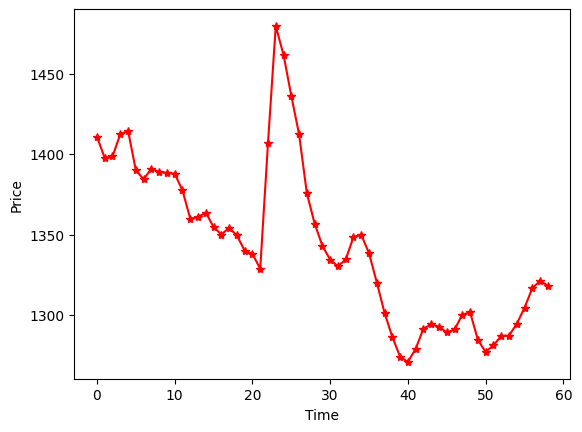

In [37]:
plt.plot(Pred_price, color = 'red', label = 'INFY Stock', marker ='*')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend